Búsqueda por coordenadas cíclicas
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Definición del problema

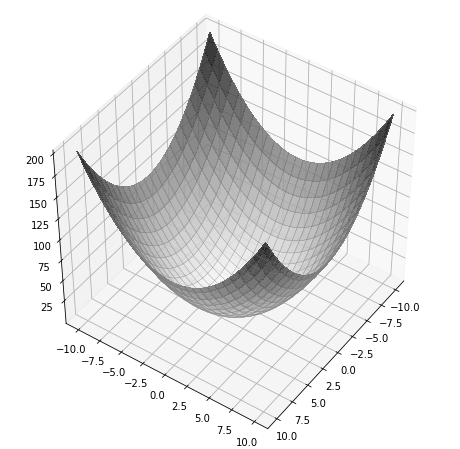

In [2]:
from plots import plot_contour, plot_surface
from testfunctions import sphere as fn

#
# Se desea encontrar el punto de mínima de la función
# esferica de dos dimensiones. El punto de mínima es
# f(0, 0) = 0. La región de busqueda es
#
#    -10 < x, y < 10
#
plot_surface(
    fn,
    x_bounds=[(-10, 10)] * 2,
)

## Búsqueda por coordenadas cíclicas

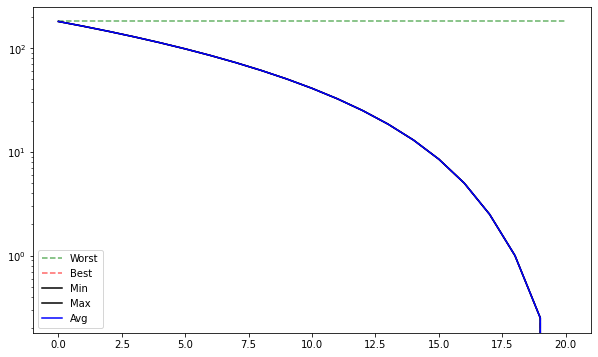

In [3]:
from fnevaluator import FnEvaluator
from generators import RandomUniform
from stats import Statistics
from coordinatesearch import CoordinateSearch


#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
evaluator = FnEvaluator(fn)

#
# Se crea una instancia del geneador para crear poblaciones
# de una sola solución.
#


monte_carlo = RandomUniform(
    pop_size=1,
    low=[9.0, 10.0],
    high=[9.0, 10.0],
    seed=123456,
)

#
# Se instancia un objeto para computar las estadísticas de
# la corrida
#
stats = Statistics()

#
# Genera una población de una sola solución
#
solutions = monte_carlo()

#
# Crea una instancia del optimizador
#
optimizer = CoordinateSearch(
    fn=fn,
    delta=0.5,
)

#
# Evalua la muestra aleatoria
#
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [4]:
stats.x_opt, stats.fn_opt

(array([0., 0.]), 0.0)

In [5]:
stats.min

[181.0,
 162.5,
 145.0,
 128.5,
 113.0,
 98.5,
 85.0,
 72.5,
 61.0,
 50.5,
 41.0,
 32.5,
 25.0,
 18.5,
 13.0,
 8.5,
 5.0,
 2.5,
 1.0,
 0.25,
 0.0]

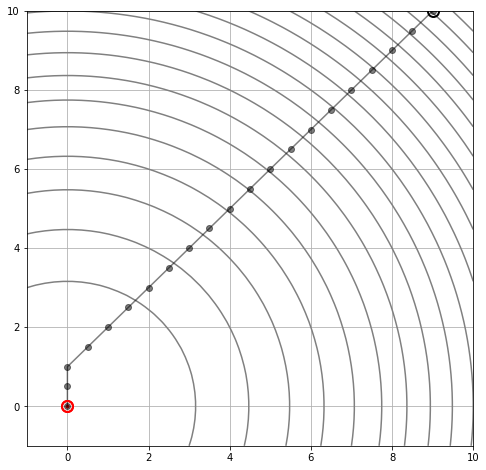

In [6]:
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-1, 10)] * 2, minimum=[(0, 0)])

## Genetización del método de coordenadas cíclicas (equivalente a reiniciar)

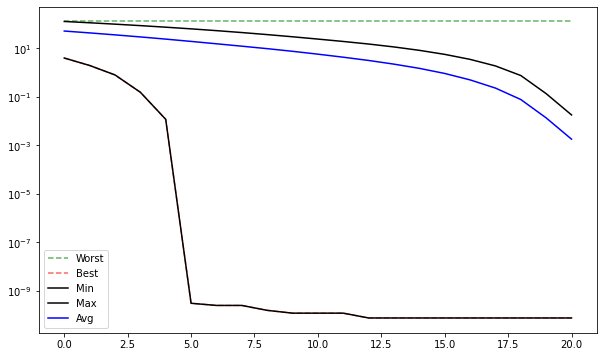

In [7]:
#
# Inicializa los operadores
#
stats = Statistics()

POPSIZE = 10
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-10, -10],
    high=[10, 10],
)

optimizer = CoordinateSearch(
    fn=fn,
    delta=0.5,
)

#
# Algoritmo
#
solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [8]:
stats.x_opt, stats.fn_opt

(array([3.93585305e-06, 7.73641846e-06]), 7.534310987429224e-11)